In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import os, glob
import matplotlib.pyplot as plt
import scipy as sp
import scipy.fftpack
import scipy.stats
from matplotlib.dates import DateFormatter, date2num

In [2]:
file_path = r'D:\Stations_data\Stations_data\Bani\all_months_copy'
os.chdir(file_path)

In [3]:
df1 = pd.read_csv('till_january.csv', sep = ',') #arse_dates = 'date')

df1['date'] = pd.to_datetime(df1.date, format = '%d.%m.%Y %H:%M:%S')
df1.set_index('date', inplace = True)
df1_1hr = df1.resample('60min').mean()
df1_1day = df1.resample('1440min').mean()

In [4]:
df2 = pd.read_csv('Rainfall_data_new.csv', sep = ',')
df2['Date & Time'] = pd.to_datetime(df2['Date & Time'])#, format = "%d/%m/%Y - %H:%M:%S")
df2 = df2.set_index('Date & Time')
df2_1hr = df2.resample('60min').mean()
df2_1hr = df2_1hr.fillna(0.0)
df2_1hr.shape

(7998, 3)

In [5]:
df3 = pd.read_csv('Temp_Rain_Bani.csv', sep = ',')
df3['Date & Time'] = pd.to_datetime(df3['Date & Time'], format = "%d/%m/%Y - %H:%M:%S")
df3 = df3.set_index('Date & Time')
df3_1hr = df3.resample('60min').mean()
# df3_1hr.head()

In [6]:
# date_mask = (df1_1hr.index >= '2020-09-25') & (df1_1hr.index < '2020-10-15')

In [7]:
# Pre-Monsoon
date_mask1 = (df1_1hr.index >= '2020-04-13') & (df1_1hr.index < '2020-04-17')
date_mask2 = (df2_1hr.index >= '2020-04-13') & (df2_1hr.index < '2020-04-17')
date_mask3 = (df3_1hr.index >= '2020-04-13') & (df3_1hr.index < '2020-04-17')

# # Monsoon
# date_mask1 = (df1_1hr.index >= '2020-07-01') & (df1_1hr.index < '2020-07-07')
# date_mask2 = (df2_1hr.index >= '2020-07-01') & (df2_1hr.index < '2020-07-07')
# date_mask3 = (df3_1hr.index >= '2020-07-01') & (df3_1hr.index < '2020-07-07')

# # Post-Monsoon
# date_mask1 = (df1_1hr.index >= '2020-10-08') & (df1_1hr.index < '2020-10-14')
# date_mask2 = (df2_1hr.index >= '2020-10-08') & (df2_1hr.index < '2020-10-14')
# date_mask3 = (df3_1hr.index >= '2020-10-08') & (df3_1hr.index < '2020-10-14')

# # Winter
# date_mask1 = (df1_1hr.index >= '2020-12-20') & (df1_1hr.index < '2020-12-26')
# date_mask2 = (df2_1hr.index >= '2020-12-20') & (df2_1hr.index < '2020-12-26')
# date_mask3 = (df3_1hr.index >= '2020-12-20') & (df3_1hr.index < '2020-12-26')

In [8]:
dfs = [df1_1hr, df2_1hr, df3_1hr]

# Extracting the desired slice of Time-Series (Soil-Moisture)
SM_sensor1 = df1_1hr['S1SM'].loc[date_mask1]
SM_sensor2 = df1_1hr['S2SM'].loc[date_mask1]
SM_sensor3 = df1_1hr['S3SM'].loc[date_mask1]
SM_sensor4 = df1_1hr['S4SM'].loc[date_mask1]
SM_sensor5 = df1_1hr['S5SM'].loc[date_mask1]
SM_sensor6 = df1_1hr['S6SM'].loc[date_mask1]
SM_sensor7 = df1_1hr['S7SM'].loc[date_mask1]
SM_sensor8 = df1_1hr['S8SM'].loc[date_mask1]
SM_sensor9 = df1_1hr['S9SM'].loc[date_mask1]
SM_sensor10 = df1_1hr['S10SM'].loc[date_mask1]

# Extracting the desired slice of Time-Series (Soil-Temperature)
ST_sensor1 = df1_1hr['S1Temp'].loc[date_mask1]
ST_sensor2 = df1_1hr['S2Temp'].loc[date_mask1]
ST_sensor3 = df1_1hr['S3Temp'].loc[date_mask1]
ST_sensor4 = df1_1hr['S4Temp'].loc[date_mask1]
ST_sensor5 = df1_1hr['S5Temp'].loc[date_mask1]
ST_sensor6 = df1_1hr['S6Temp'].loc[date_mask1]
ST_sensor7 = df1_1hr['S7Temp'].loc[date_mask1]
ST_sensor8 = df1_1hr['S8Temp'].loc[date_mask1]
ST_sensor9 = df1_1hr['S9Temp'].loc[date_mask1]
ST_sensor10 = df1_1hr['S10Temp'].loc[date_mask1]

# Extracting the desired slice of Time-Series (Rain-Fall)
Rainfall = df2_1hr['Int_Rainfall (mm)'].loc[date_mask2]

# Extracting the desired slice of Time-Series (Air-Temperature)
Air_Temp = df3_1hr['Temp (0C)'].loc[date_mask3]

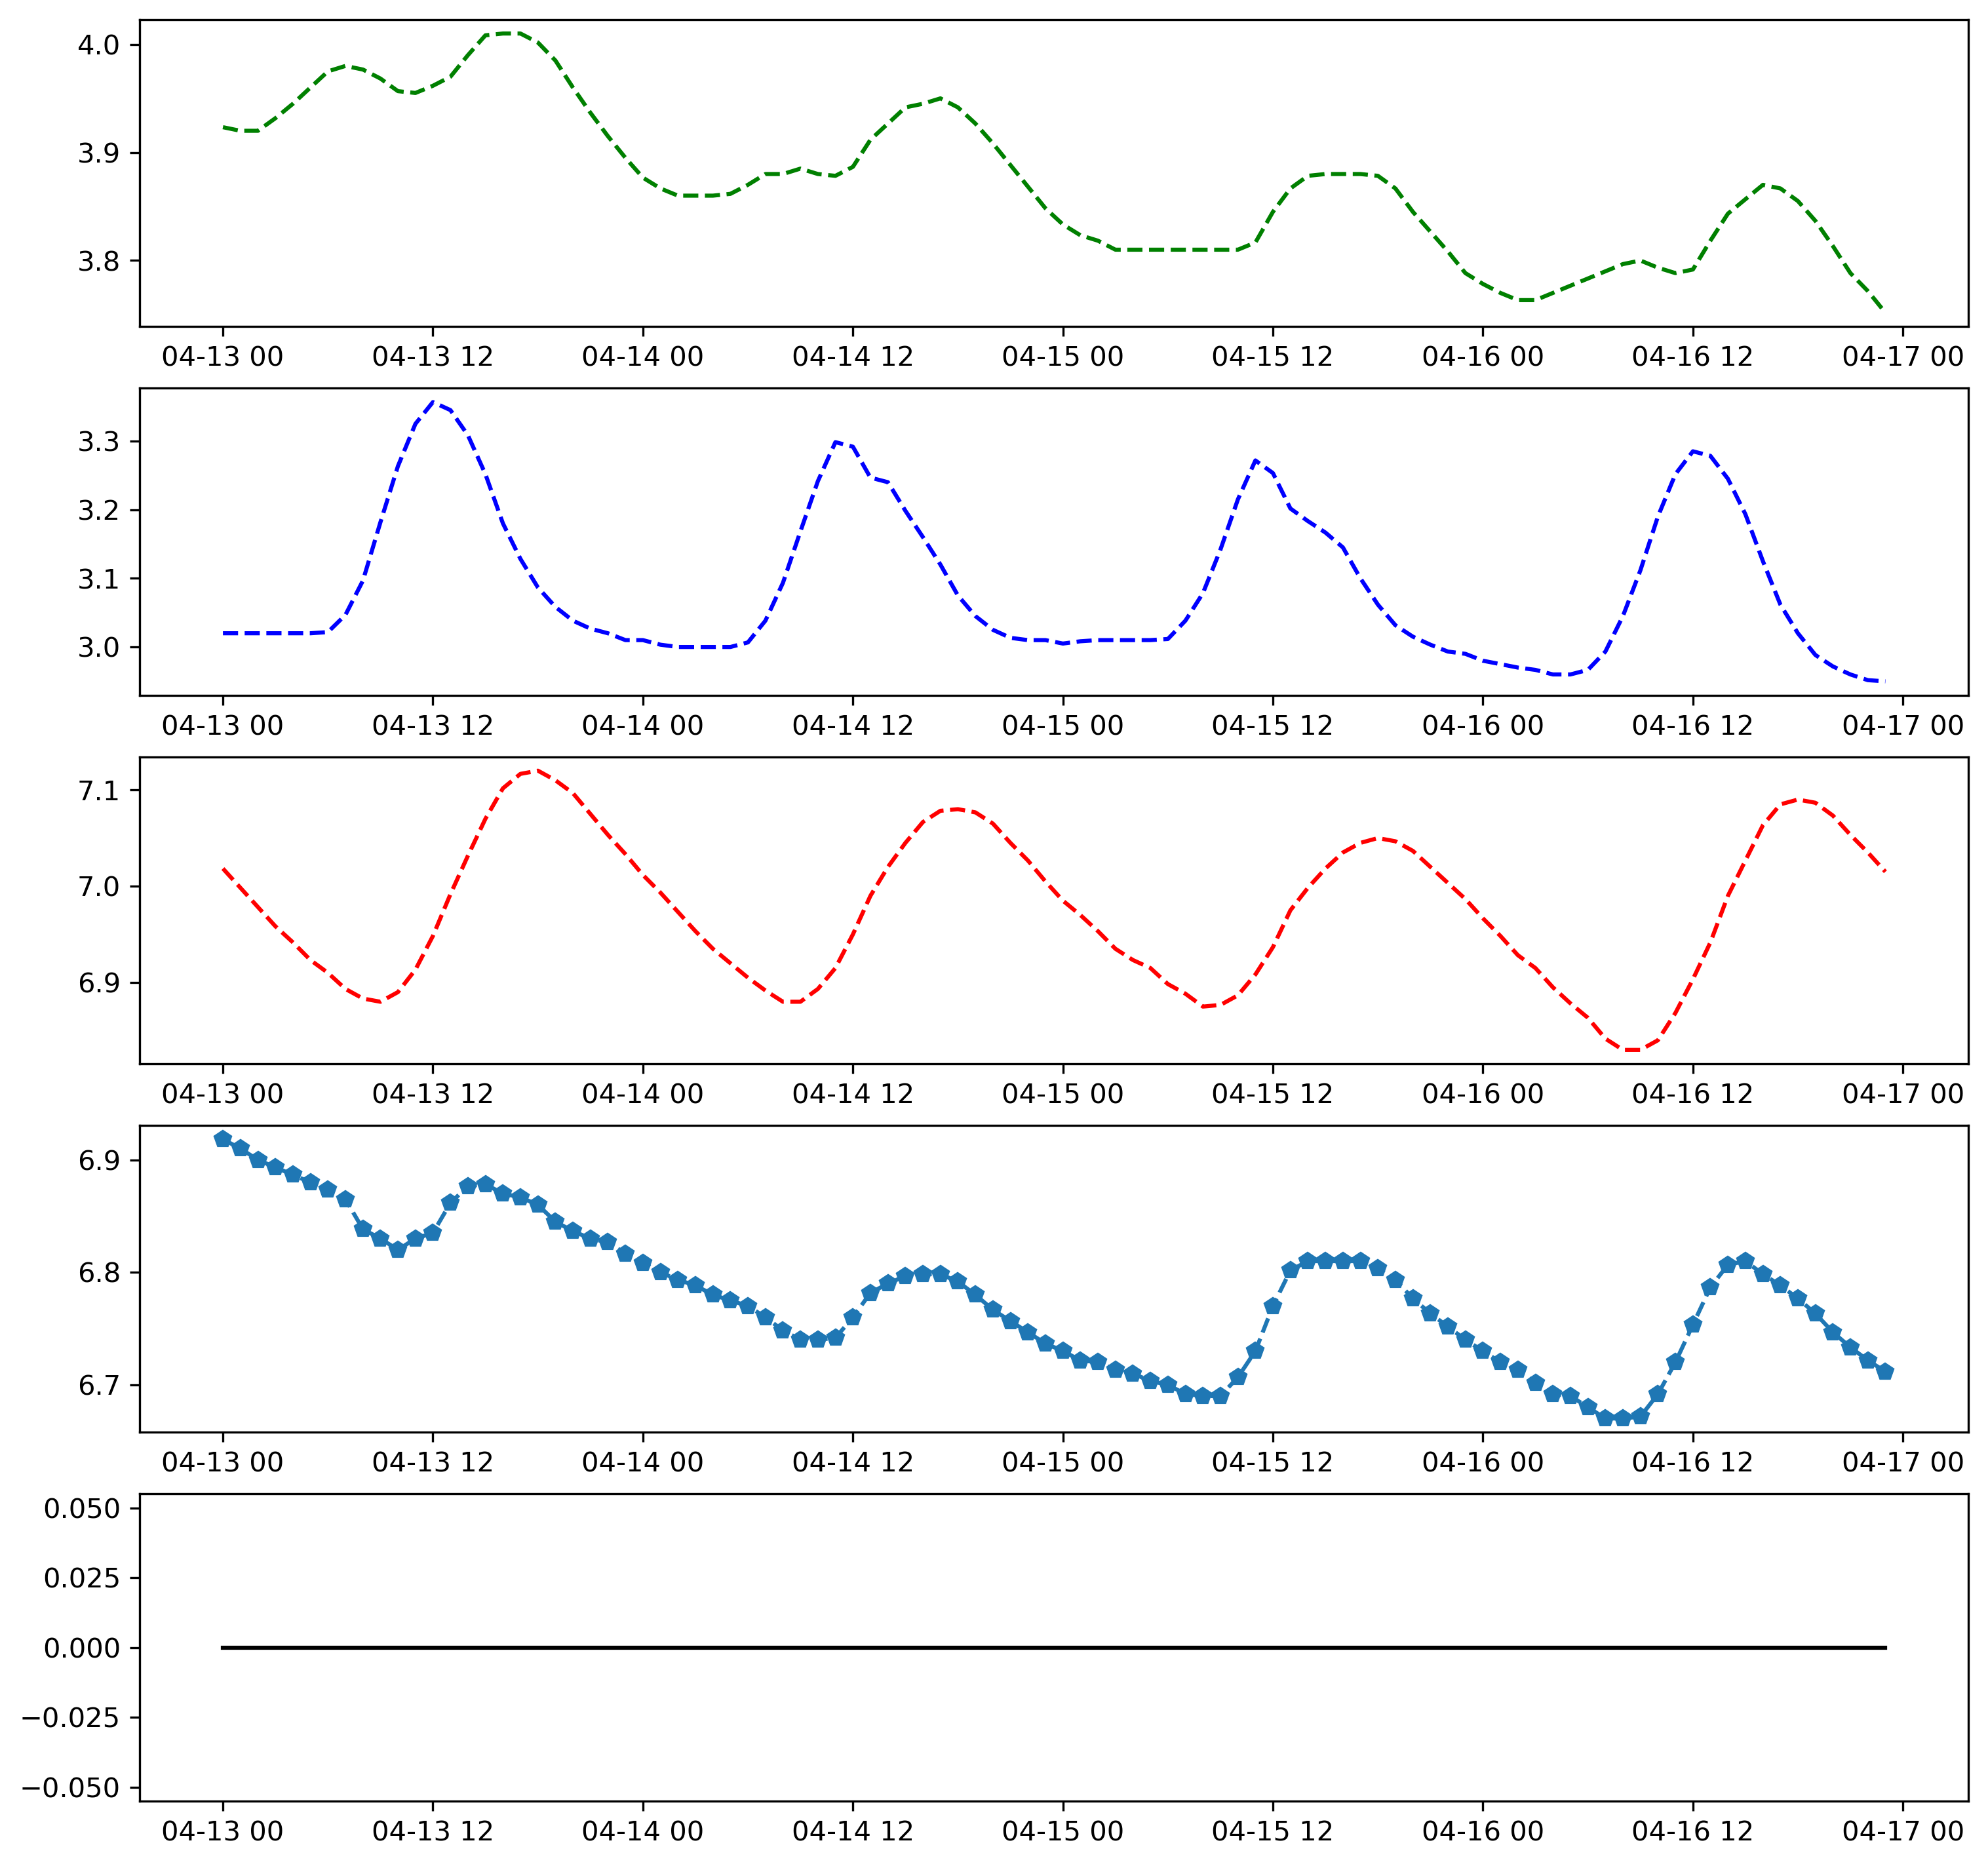

In [9]:
fig, ax = plt.subplots(5, 1, figsize = (12, 12), dpi = 300)
ax[0].plot(SM_sensor1, 'g--', label = 'Sensor-1')
ax[1].plot(SM_sensor5, 'b--', label = 'Sensor-5')
ax[2].plot(SM_sensor6, 'r--', label = 'Sensor-7')
ax[3].plot(SM_sensor7, 'p--', label = 'Sensor-9')
ax[4].plot(Rainfall, 'k', label = 'Rainfall');
# ax[0,1,2,3,4,5,6].legend();

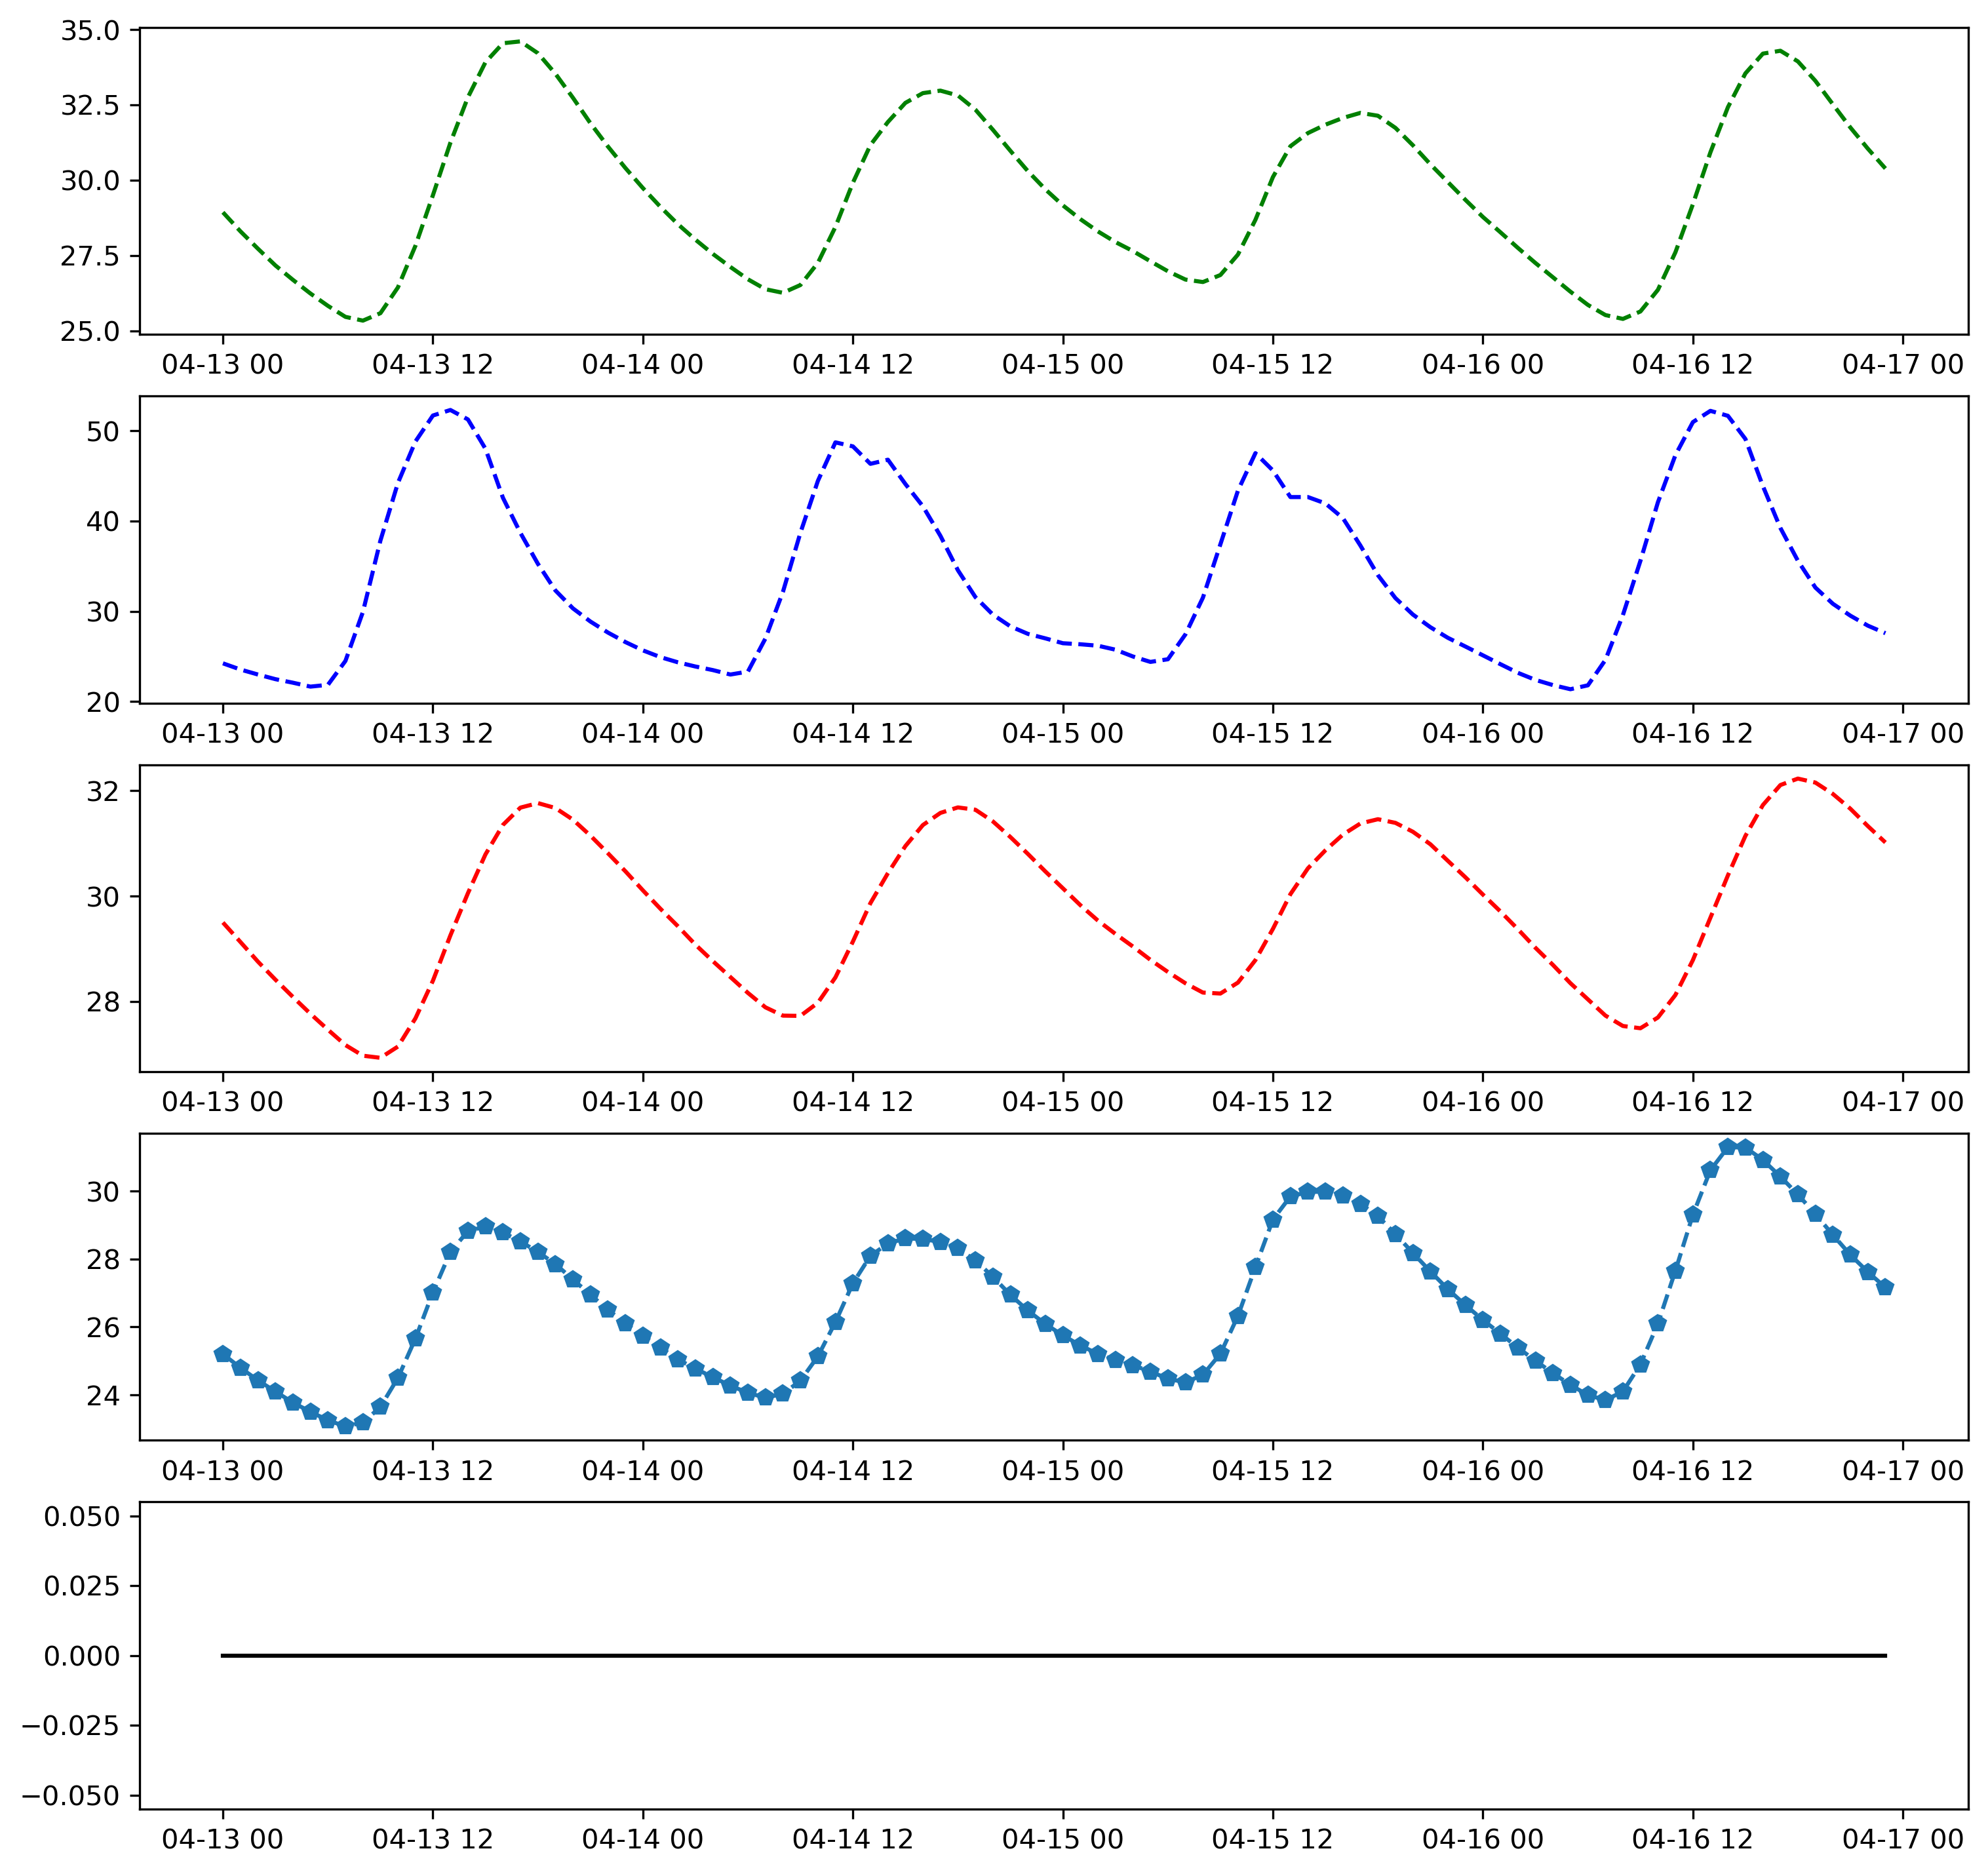

In [36]:
fig, ax = plt.subplots(5, 1, figsize = (12, 12), dpi = 300)
ax[0].plot(ST_sensor1, 'g--', label = 'Sensor-1')
ax[1].plot(ST_sensor5, 'b--', label = 'Sensor-5')
ax[2].plot(ST_sensor6, 'r--', label = 'Sensor-7')
ax[3].plot(ST_sensor7, 'p--', label = 'Sensor-9')
ax[4].plot(Rainfall, 'k', label = 'Rainfall');

In [10]:
# SM_sensor1 = SM_sensor1.interpolate(method='linear')
# SM_sensor2 = SM_sensor2.values.fillna(method='ffill')
# SM_sensor3 = SM_sensor3.values.fillna(method='ffill')
# SM_sensor4 = SM_sensor4.values.fillna(method='ffill')
# SM_sensor5 = SM_sensor5.values.fillna(method='ffill')

In [29]:
SM_sensor1 = SM_sensor1.interpolate(method= 'quadratic')
# SM_sensor2 = SM_sensor2.interpolate(method= 'quadratic')
# SM_sensor3 = SM_sensor3.interpolate(method= 'quadratic')
# SM_sensor4 = SM_sensor4.interpolate(method= 'quadratic')
SM_sensor5 = SM_sensor5.interpolate(method= 'quadratic')
# SM_sensor6 = SM_sensor6.interpolate(method= 'quadratic')
SM_sensor7 = SM_sensor7.interpolate(method= 'quadratic')
# SM_sensor8 = SM_sensor8.interpolate(method= 'quadratic')
SM_sensor9 = SM_sensor9.interpolate(method= 'quadratic')
# SM_sensor10 = SM_sensor10.interpolate(method= 'quadratic')

ST_sensor1 = ST_sensor1.interpolate(method= 'quadratic')
# ST_sensor2 = ST_sensor2.interpolate(method= 'quadratic')
# ST_sensor3 = ST_sensor3.interpolate(method= 'quadratic')
# ST_sensor4 = ST_sensor4.interpolate(method= 'quadratic')
ST_sensor5 = ST_sensor5.interpolate(method= 'quadratic')
# ST_sensor6 = ST_sensor6.interpolate(method= 'quadratic')
ST_sensor7 = ST_sensor7.interpolate(method= 'quadratic')
# ST_sensor8 = ST_sensor8.interpolate(method= 'quadratic')
ST_sensor9 = ST_sensor9.interpolate(method= 'quadratic')
# ST_sensor10 = ST_sensor10.interpolate(method= 'quadratic')
Air_Temp = Air_Temp.interpolate(method= 'quadratic')

In [30]:
# picking the maximum soil moisture, soil temperature and air temperature values per day

max_S1SM_hour= SM_sensor1.groupby(pd.Grouper(freq='D')).idxmax()
max_S2SM_hour= SM_sensor2.groupby(pd.Grouper(freq='D')).idxmax()
max_S3SM_hour= SM_sensor3.groupby(pd.Grouper(freq='D')).idxmax()
max_S4SM_hour= SM_sensor4.groupby(pd.Grouper(freq='D')).idxmax()
max_S5SM_hour= SM_sensor5.groupby(pd.Grouper(freq='D')).idxmax()
max_S6SM_hour= SM_sensor6.groupby(pd.Grouper(freq='D')).idxmax()
max_S7SM_hour= SM_sensor7.groupby(pd.Grouper(freq='D')).idxmax()
max_S8SM_hour= SM_sensor8.groupby(pd.Grouper(freq='D')).idxmax()
max_S9SM_hour= SM_sensor9.groupby(pd.Grouper(freq='D')).idxmax()
max_S10SM_hour= SM_sensor10.groupby(pd.Grouper(freq='D')).idxmax()

max_S1ST_hour= ST_sensor1.groupby(pd.Grouper(freq='D')).idxmax()
max_S2ST_hour= ST_sensor2.groupby(pd.Grouper(freq='D')).idxmax()
max_S3ST_hour= ST_sensor3.groupby(pd.Grouper(freq='D')).idxmax()
max_S4ST_hour= ST_sensor4.groupby(pd.Grouper(freq='D')).idxmax()
max_S5ST_hour= ST_sensor5.groupby(pd.Grouper(freq='D')).idxmax()
max_S6ST_hour= ST_sensor6.groupby(pd.Grouper(freq='D')).idxmax()
max_S7ST_hour= ST_sensor7.groupby(pd.Grouper(freq='D')).idxmax()
max_S8ST_hour= ST_sensor8.groupby(pd.Grouper(freq='D')).idxmax()
max_S9ST_hour= ST_sensor9.groupby(pd.Grouper(freq='D')).idxmax()
max_S10ST_hour= ST_sensor10.groupby(pd.Grouper(freq='D')).idxmax()
max_AirT_hour= Air_Temp.groupby(pd.Grouper(freq='D')).idxmax()

In [31]:
## Soil Temperature and air temperature lag

# Temperature lags
T_S1_lag = max_S1ST_hour - max_AirT_hour
T_S5_lag = max_S5ST_hour - max_AirT_hour
T_S7_lag = max_S7ST_hour - max_AirT_hour
T_S9_lag = max_S9ST_hour - max_AirT_hour

#Temperature and moisture lags
# SMT_S1_lag = max_S1ST_hour - max_S1SM_hour
# SMT_S5_lag = max_S5ST_hour - max_S5SM_hour
# SMT_S7_lag = max_S7ST_hour - max_S7SM_hour
# SMT_S9_lag = max_S9ST_hour - max_S9SM_hour

In [32]:
print('Soil Temperature: Sensor1')
print(max_S1ST_hour)
print('\n')
print('Soil Temperature: Sensor5')
print(max_S5ST_hour)
print('\n')
print('Soil Temperature: Sensor7')
print(max_S7ST_hour)
print('\n')
print('Soil Temperature: Sensor9')
print(max_S9ST_hour)
print('\n')
print('Air Temperature')
print(max_AirT_hour)

Soil Temperature: Sensor1
date
2020-04-13   2020-04-13 17:00:00
2020-04-14   2020-04-14 17:00:00
2020-04-15   2020-04-15 17:00:00
2020-04-16   2020-04-16 17:00:00
Freq: D, Name: S1Temp, dtype: datetime64[ns]


Soil Temperature: Sensor5
date
2020-04-13   2020-04-13 13:00:00
2020-04-14   2020-04-14 11:00:00
2020-04-15   2020-04-15 11:00:00
2020-04-16   2020-04-16 13:00:00
Freq: D, Name: S5Temp, dtype: datetime64[ns]


Soil Temperature: Sensor7
date
2020-04-13   2020-04-13 15:00:00
2020-04-14   2020-04-14 15:00:00
2020-04-15   2020-04-15 15:00:00
2020-04-16   2020-04-16 14:00:00
Freq: D, Name: S7Temp, dtype: datetime64[ns]


Soil Temperature: Sensor9
date
2020-04-13   2020-04-13 15:00:00
2020-04-14   2020-04-14 15:00:00
2020-04-15   2020-04-15 12:00:00
2020-04-16   2020-04-16 15:00:00
Freq: D, Name: S9Temp, dtype: datetime64[ns]


Air Temperature
Date & Time
2020-04-13   2020-04-13 14:00:00
2020-04-14   2020-04-14 13:00:00
2020-04-15   2020-04-15 15:00:00
2020-04-16   2020-04-16 14:00:00


In [33]:
print("#####Soil - Air Temperature lag#####")
print('Sensor1 Lag:', '\n', T_S1_lag)
print('Sensor5 Lag:', '\n', T_S5_lag)
print('Sensor7 Lag:', '\n', T_S7_lag)
print('Sensor9 Lag:', '\n', T_S9_lag)

#####Soil - Air Temperature lag#####
Sensor1 Lag: 
 date
2020-04-13   0 days 03:00:00
2020-04-14   0 days 04:00:00
2020-04-15   0 days 02:00:00
2020-04-16   0 days 03:00:00
Freq: D, dtype: timedelta64[ns]
Sensor5 Lag: 
 date
2020-04-13   -1 days +23:00:00
2020-04-14   -1 days +22:00:00
2020-04-15   -1 days +20:00:00
2020-04-16   -1 days +23:00:00
Freq: D, dtype: timedelta64[ns]
Sensor7 Lag: 
 date
2020-04-13   0 days 01:00:00
2020-04-14   0 days 02:00:00
2020-04-15   0 days 00:00:00
2020-04-16   0 days 00:00:00
Freq: D, dtype: timedelta64[ns]
Sensor9 Lag: 
 date
2020-04-13     0 days 01:00:00
2020-04-14     0 days 02:00:00
2020-04-15   -1 days +21:00:00
2020-04-16     0 days 01:00:00
Freq: D, dtype: timedelta64[ns]


In [34]:
print('Sensor1 Max Soil Moisture:', '\n', max_S1SM_hour)
print('Sensor5 Max Soil Moisture:', '\n', max_S5SM_hour)
print('Sensor7 Max Soil Moisture:', '\n', max_S7SM_hour)
print('Sensor9 Max Soil Moisture:', '\n', max_S9SM_hour)

Sensor1 Max Soil Moisture: 
 date
2020-04-13   2020-04-13 16:00:00
2020-04-14   2020-04-14 17:00:00
2020-04-15   2020-04-15 15:00:00
2020-04-16   2020-04-16 16:00:00
Freq: D, Name: S1SM, dtype: datetime64[ns]
Sensor5 Max Soil Moisture: 
 date
2020-04-13   2020-04-13 12:00:00
2020-04-14   2020-04-14 11:00:00
2020-04-15   2020-04-15 11:00:00
2020-04-16   2020-04-16 12:00:00
Freq: D, Name: S5SM, dtype: datetime64[ns]
Sensor7 Max Soil Moisture: 
 date
2020-04-13   2020-04-13 00:00:00
2020-04-14   2020-04-14 00:00:00
2020-04-15   2020-04-15 14:00:00
2020-04-16   2020-04-16 15:00:00
Freq: D, Name: S7SM, dtype: datetime64[ns]
Sensor9 Max Soil Moisture: 
 date
2020-04-13   2020-04-13 14:00:00
2020-04-14   2020-04-14 13:00:00
2020-04-15   2020-04-15 12:00:00
2020-04-16   2020-04-16 14:00:00
Freq: D, Name: S9SM, dtype: datetime64[ns]


In [23]:
# timelag_df = pd.concat([T_S1_lag, T_S5_lag, SMT_S1_lag, SMT_S5_lag], axis = 1)
# # x = pd.to_timedelta(T_S1_lag)
# # y = pd.to_datetime(x)
# # plt.plot(y, 'r')
# # plt.ytick_label[1, 2, 3, 4, 5];
# timelag_df.rename(columns = {"0": 'S1_Temp_Lag', "1": 'S5_Temp_Lag', "3":'S1_SMT_Lag',
#                              "4":'S5_SMT_Lag'}, inplace = True)
# timelag_df

In [35]:
fg, ax = plt.subplots(2, 2, figsize=(24, 12), dpi=600)
fg.autofmt_xdate(rotation=35)
ax0 = ax[0,0].twinx()
# axx1 = axx.twinx()
ax[0,0].plot(ST_sensor1, 'r.-', label = 'Soil Temperature')
ax[0,0].grid()
ax[0,0].set_title('Seneor - 11')
ax[0,0].plot(Air_Temp, 'm.-', label = 'Air Temperature')
ax[0,0].set_ylabel('Temperature [$^\circ$C]')
ax[0,0].vlines(max_S1ST_hour, ST_sensor1.min(), ST_sensor1.max(), color = 'red', label = 'Soil Temperature Maximum',
          linestyles = 'dashdot')
ax[0,0].vlines(max_AirT_hour, Air_Temp.min(), Air_Temp.max(), color = 'magenta', label = 'Air Temperature Maximum',
           linestyles = 'dotted')
ax0.bar(T_S1_lag.index, (T_S1_lag.values/np.timedelta64(3600, 's')), color = 'green', width = 0.3,
        alpha = 0.7, label = 'Time-lag')
ax0.set_ylabel('Time-lag (Hrs)')

ax1 = ax[0,1].twinx()
ax[0,1].plot(ST_sensor5, 'r.-', label = 'Soil Temperature')
ax[0,1].grid()
ax[0,1].set_title('Seneor - 15')
ax[0,1].plot(Air_Temp, 'm.-', label = 'Air Temperature')
ax[0,1].set_ylabel('Temperature [$^\circ$C]')
ax[0,1].vlines(max_S5ST_hour, ST_sensor5.min(), ST_sensor5.max(), color = 'red', label = 'Soil Temperature Maximum',
          linestyles = 'dashdot')
ax[0,1].vlines(max_AirT_hour, Air_Temp.min(), Air_Temp.max(), color = 'magenta', label = 'Air Temperature Maximum',
           linestyles = 'dotted')
ax1.bar(T_S5_lag.index, (T_S5_lag.values/np.timedelta64(3600, 's')), color = 'green', width = 0.3,
        alpha = 0.7, label = 'Time-lag')
ax1.set_ylabel('Time-lag (Hrs)')

ax2 = ax[1,0].twinx()
ax[1,0].plot(ST_sensor7, 'r.-', label = 'Soil Temperature')
ax[1,0].grid()
ax[1,0].set_title('Seneor - 17')
ax[1,0].plot(Air_Temp, 'm.-', label = 'Air Temperature')
ax[1,0].set_ylabel('Temperature [$^\circ$C]')
ax[1,0].vlines(max_S7ST_hour, ST_sensor7.min(), ST_sensor7.max(), color = 'red', label = 'Soil Temperature Maximum',
          linestyles = 'dashdot')
ax[1,0].vlines(max_AirT_hour, Air_Temp.min(), Air_Temp.max(), color = 'magenta', label = 'Air Temperature Maximum',
           linestyles = 'dotted')
ax2.bar(T_S7_lag.index, (T_S7_lag.values/np.timedelta64(3600, 's')), color = 'green', width = 0.3,
        alpha = 0.7, label = 'Time-lag')
ax2.set_ylabel('Time-lag (Hrs)')
ax[1,0].set_xlabel('Time (Date)')

ax3 = ax[1,1].twinx()
ax[1,1].plot(ST_sensor7, 'r.-', label = 'Soil Temperature')
ax[1,1].grid()
ax[1,1].set_title('Seneor - 19')
ax[1,1].plot(Air_Temp, 'm.-', label = 'Air Temperature')
ax[1,1].set_ylabel('Temperature [$^\circ$C]')
ax[1,1].vlines(max_S9ST_hour, ST_sensor9.min(), ST_sensor9.max(), color = 'red', label = 'Soil Temperature Maximum',
          linestyles = 'dashdot')
ax[1,1].vlines(max_AirT_hour, Air_Temp.min(), Air_Temp.max(), color = 'magenta', label = 'Air Temperature Maximum',
           linestyles = 'dotted')
ax3.bar(T_S9_lag.index, (T_S9_lag.values/np.timedelta64(3600, 's')), color = 'green', width = 0.3,
        alpha = 0.7, label = 'Time-lag')
ax3.set_ylabel('Time-lag (Hrs)')
ax[1,1].set_xlabel('Time (Date)')

ax0.legend(loc = 2)
ax[0,0].legend(loc = 1)

plt.tight_layout()
plt.show()

In [25]:
# fg, ax = plt.subplots(3,1, figsize=(12, 12), dpi=600)
# fg.autofmt_xdate(rotation=35)
# ax0 = ax[0].twinx()
# # axx1 = axx.twinx()
# ax[0].plot(ST_sensor1, 'r.-', label = 'Soil Temperature')
# ax[0].grid()
# ax[0].set_title('Seneor - 11')
# ax[0].plot(Air_Temp, 'm.-', label = 'Air Temperature')
# ax[0].set_ylabel('Temperature [$^\circ$C]')
# ax[0].vlines(max_S1ST_hour, ST_sensor1.min(), ST_sensor1.max(), color = 'red', label = 'Soil Temperature Maximum',
#           linestyles = 'dashdot')
# ax[0].vlines(max_AirT_hour, Air_Temp.min(), Air_Temp.max(), color = 'magenta', label = 'Air Temperature Maximum',
#            linestyles = 'dotted')
# ax0.bar(T_S1_lag.index, (T_S1_lag.values/np.timedelta64(3600, 's')), color = 'green', width = 0.3,
#         alpha = 0.7, label = 'Time-lag')
# ax0.set_ylabel('Time-lag (Hrs)')

# ax1 = ax[1].twinx()
# ax[1].plot(ST_sensor5, 'r.-', label = 'Soil Temperature')
# ax[1].grid()
# ax[1].set_title('Seneor - 15')
# ax[1].plot(Air_Temp, 'm.-', label = 'Air Temperature')
# ax[1].set_ylabel('Temperature [$^\circ$C]')
# ax[1].vlines(max_S5ST_hour, ST_sensor5.min(), ST_sensor5.max(), color = 'red', label = 'Soil Temperature Maximum',
#           linestyles = 'dashdot')
# ax[1].vlines(max_AirT_hour, Air_Temp.min(), Air_Temp.max(), color = 'magenta', label = 'Air Temperature Maximum',
#            linestyles = 'dotted')
# ax1.bar(T_S5_lag.index, (T_S5_lag.values/np.timedelta64(3600, 's')), color = 'green', width = 0.3,
#         alpha = 0.7, label = 'Time-lag')
# ax1.set_ylabel('Time-lag (Hrs)')

# ax2 = ax[2].twinx()
# ax[2].plot(ST_sensor7, 'r.-', label = 'Soil Temperature')
# ax[2].grid()
# ax[2].set_title('Seneor - 17')
# ax[2].plot(Air_Temp, 'm.-', label = 'Air Temperature')
# ax[2].set_ylabel('Temperature [$^\circ$C]')
# ax[2].vlines(max_S7ST_hour, ST_sensor7.min(), ST_sensor7.max(), color = 'red', label = 'Soil Temperature Maximum',
#           linestyles = 'dashdot')
# ax[2].vlines(max_AirT_hour, Air_Temp.min(), Air_Temp.max(), color = 'magenta', label = 'Air Temperature Maximum',
#            linestyles = 'dotted')
# ax2.bar(T_S7_lag.index, (T_S7_lag.values/np.timedelta64(3600, 's')), color = 'green', width = 0.3,
#         alpha = 0.7, label = 'Time-lag')
# ax2.set_ylabel('Time-lag (Hrs)')
# ax[2].set_xlabel('Time (Date)')


# ax0.legend(loc = 2)
# ax[0].legend(loc = 1)

# plt.tight_layout()
# plt.show()

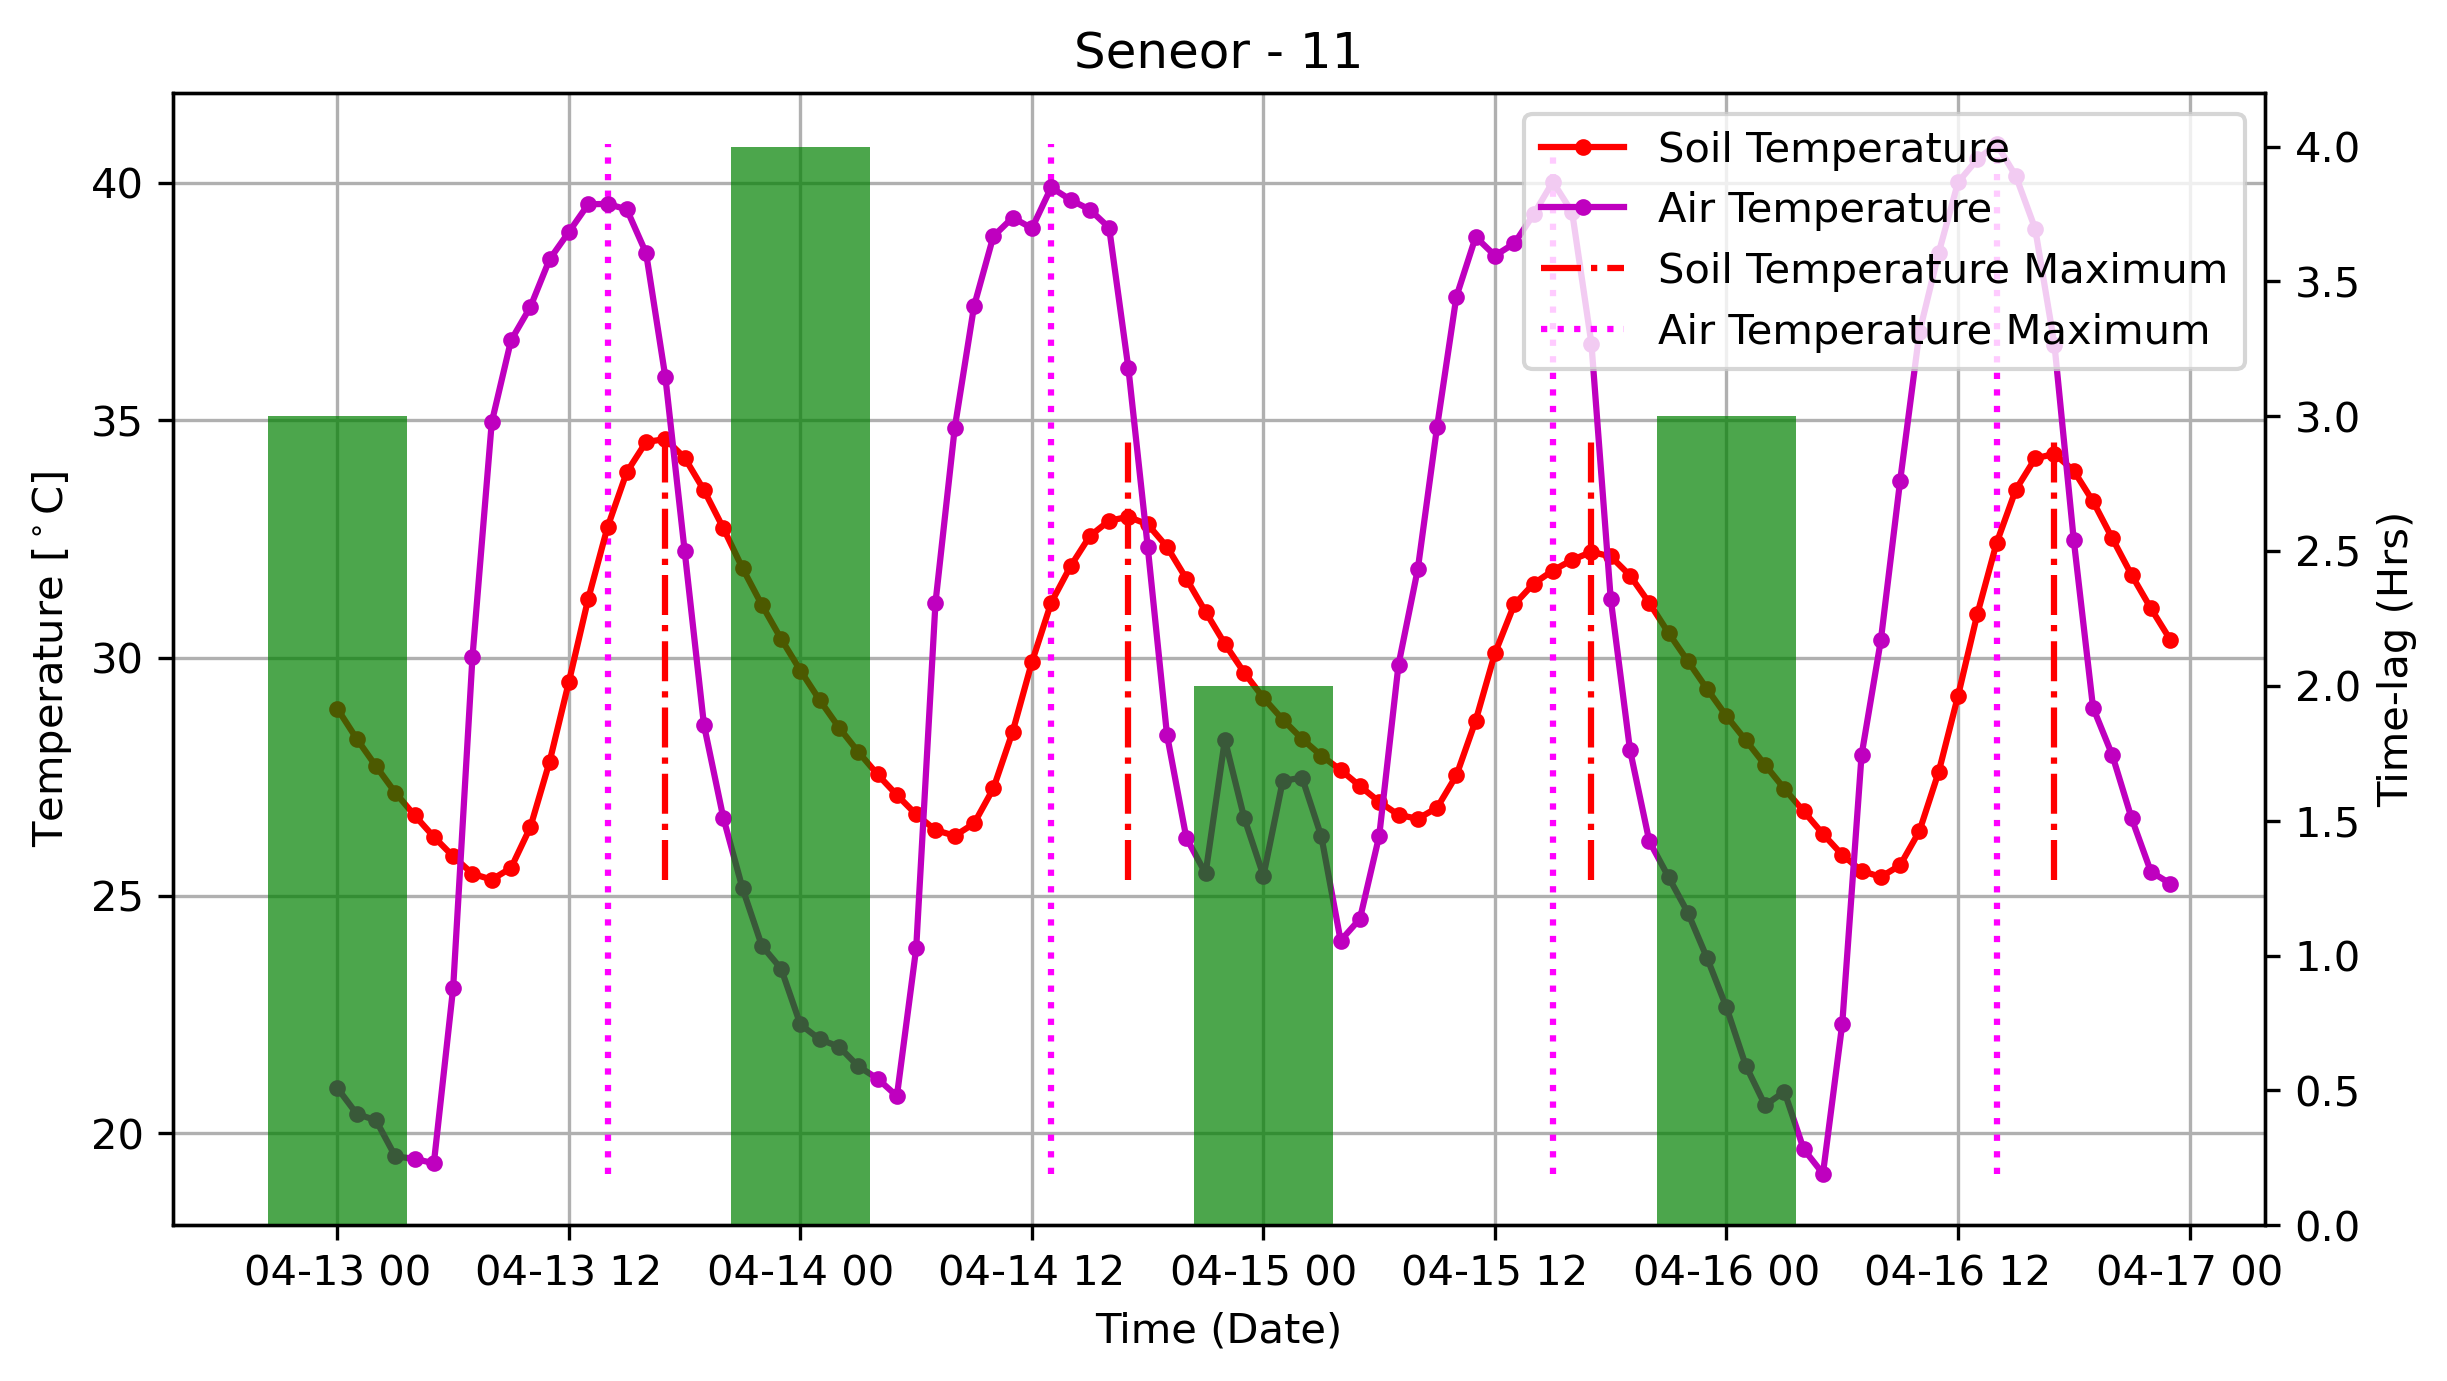

In [26]:
# '''
# # fg, ax1 = plt.subplots(2, 1, figsize=(20, 20), dpi=300)
# # # ax0 = ax[0].twinx()
# # ax1[0].plot(ST_sensor5, 'r')
# # ax1[0].set_ylabel('Soil Temperature')
# # ax1[0].set_xlabel('Time (Date)')
# # ax1[0].grid()
# # bx10 = ax[1].twinx()
# # ax1[1].plot(Air_Temp, 'r--')
# # bx10.plot(Rainfall, 'k', label = 'Rainfall')
# # ax1[1].set_ylabel('Air Temperature')
# # ax1[1].set_xlabel('Time (Date)')
# # ax1[1].grid()
# # plt.xticks(rotation = 35)
# # ax1[0].vlines(max_S5ST_hour, ST_sensor5.min(), ST_sensor5.max())
# # ax1[1].vlines(max_AT_hour, Air_Temp.min(), Air_Temp.max())
# # # plt.savefig('Bansathi_S1_SM_2020-10.png', dpi=300)
# # plt.show()
# '''

fg, ax1 = plt.subplots(1, 1, figsize=(9, 5), dpi=300)
ax10 = ax1.twinx()
# axx1 = axx.twinx()
ax10.bar(T_S1_lag.index, (T_S1_lag.values/np.timedelta64(3600, 's')), color = 'green', width = 0.3,
        alpha = 0.7, label = 'Time-lag')
ax10.set_ylabel('Time-lag (Hrs)')
ax1.plot(ST_sensor1, 'r.-', label = 'Soil Temperature')
# axx0.plot(Rainfall, 'k', label = 'Rainfall')
# ax1.set_ylabel('Volumetric Soil Moisture ($m^3/m^3$)')
ax1.set_xlabel('Time (Date)')
ax1.set_title('Seneor - 11')
ax1.grid()
# bxx0 = axx[1].twinx()
ax1.plot(Air_Temp, 'm.-', label = 'Air Temperature')
# bxx0.plot(Rainfall, 'k', label = 'Rainfall')
ax1.set_ylabel('Temperature [$^\circ$C]')
# axx[1].set_xlabel('Time (Date)')
# axx[1].grid()
plt.xticks(rotation = 35)
ax1.vlines(max_S1ST_hour, ST_sensor1.min(), ST_sensor1.max(), color = 'red', label = 'Soil Temperature Maximum',
          linestyles = 'dashdot')
ax1.vlines(max_AirT_hour, Air_Temp.min(), Air_Temp.max(), color = 'magenta', label = 'Air Temperature Maximum',
           linestyles = 'dotted')
ax1.legend(loc = 0)
ax1.legend(loc = 1)
# plt.savefig('Bansathi_S1_SM_2020-10.png', dpi=300)
plt.show()

### Soil Moisture and Soil Temperature Lags

In [27]:

print("#####Soil Moisture - Temperature lag#####")
print('Sensor1 Lag:', '\n', SMT_S1_lag)
print('Sensor5 Lag:', '\n', SMT_S5_lag)
print('Sensor7 Lag:', '\n', SMT_S7_lag)
print('Sensor9 Lag:', '\n', SMT_S9_lag)
print('Dates', '\n', SMT_S1_lag.index)

#####Soil Moisture - Temperature lag#####
Sensor1 Lag: 
 date
2020-04-13   0 days 01:00:00
2020-04-14   0 days 00:00:00
2020-04-15   0 days 02:00:00
2020-04-16   0 days 01:00:00
Freq: D, dtype: timedelta64[ns]


NameError: name 'SMT_S5_lag' is not defined

In [ ]:
# fg, axx = plt.subplots(2, 2, figsize=(24, 12), dpi=600)
# fg.autofmt_xdate(rotation=35)
# axx00 = axx[0,0].twinx()
# axx01 = axx[0,0].twinx()
# fg.subplots_adjust(right=40)
# axx01.spines["right"].set_position(("outward",40))
# axx[0,0].plot(SM_sensor1, 'b.-', label = 'Soil Moistue')
# axx[0,0].set_ylabel("Vol. Soil Moisture ($m^3/m^3$)")
# axx[0,0].grid()
# axx[0,0].set_title('Seneor - 11')
# axx00.plot(ST_sensor1, 'r.-', label = 'Soil Temperature')
# axx00.set_ylabel('Temperature [$^\circ$C]')
# axx[0,0].vlines(max_S1SM_hour, SM_sensor1.min(), SM_sensor1.max(), color = 'blue', label = 'Soil Moisture Maximum',
#           linestyles = 'dashdot')
# axx00.vlines(max_S1ST_hour, ST_sensor1.min(), ST_sensor1.max(), color = 'red', label = 'Soil Temperature Maximum',
#            linestyles = 'dotted')
# axx01.bar(SMT_S1_lag.index, (SMT_S1_lag.values/np.timedelta64(3600, 's')), color = 'green', width = 0.3,
#         alpha = 0.7, label = 'Time-lag')
# axx01.set_ylabel('Time-lag (Hrs)')

# axx10 = axx[0,1].twinx()
# axx11 = axx[0,1].twinx()
# axx11.spines["right"].set_position(("outward",40))
# axx[0,1].plot(SM_sensor5, 'b.-', label = 'Soil Moistue')
# axx[0,1].set_ylabel("Vol. Soil Moisture ($m^3/m^3$)")
# axx[0,1].grid()
# axx[0,1].set_title('Seneor - 15')
# axx10.plot(ST_sensor5, 'r.-', label = 'Soil Temperature')
# axx10.set_ylabel('Temperature [$^\circ$C]')
# axx[0,1].vlines(max_S5SM_hour, SM_sensor5.min(), SM_sensor5.max(), color = 'blue', label = 'Soil Moisture Maximum',
#           linestyles = 'dashdot')
# axx10.vlines(max_S5ST_hour, ST_sensor5.min(), ST_sensor5.max(), color = 'red', label = 'Soil Temperature Maximum',
#            linestyles = 'dotted')
# axx11.bar(SMT_S5_lag.index, (SMT_S5_lag.values/np.timedelta64(3600, 's')), color = 'green', width = 0.3,
#         alpha = 0.7, label = 'Time-lag')
# axx11.set_ylabel('Time-lag (Hrs)')

# axx20 = axx[1,0].twinx()
# axx21 = axx[1,0].twinx()
# axx21.spines["right"].set_position(("outward",40))
# axx[1,0].plot(SM_sensor7, 'b.-', label = 'Soil Moistue')
# axx[1,0].set_ylabel("Vol. Soil Moisture ($m^3/m^3$)")
# axx[1,0].grid()
# axx[1,0].set_title('Seneor - 17')
# axx20.plot(ST_sensor7, 'r.-', label = 'Soil Temperature')
# axx20.set_ylabel('Temperature [$^\circ$C]')
# axx[1,0].vlines(max_S7SM_hour, SM_sensor7.min(), SM_sensor7.max(), color = 'blue', label = 'Soil Moisture Maximum',
#           linestyles = 'dashdot')
# axx20.vlines(max_S7ST_hour, ST_sensor7.min(), ST_sensor7.max(), color = 'red', label = 'Soil Temperature Maximum',
#            linestyles = 'dotted')
# axx21.bar(SMT_S7_lag.index, (SMT_S7_lag.values/np.timedelta64(3600, 's')), color = 'green', width = 0.3,
#         alpha = 0.7, label = 'Time-lag')
# axx21.set_ylabel('Time-lag (Hrs)')
# axx[1,0].set_xlabel('Time (Date)')

# axx30 = axx[1,1].twinx()
# axx31 = axx[1,1].twinx()
# axx31.spines["right"].set_position(("outward",40))
# axx[1,1].plot(SM_sensor9, 'b.-', label = 'Soil Moistue')
# axx[1,1].set_ylabel("Vol. Soil Moisture ($m^3/m^3$)")
# axx[1,1].grid()
# axx[1,1].set_title('Seneor - 19')
# axx30.plot(ST_sensor9, 'r.-', label = 'Soil Temperature')
# axx30.set_ylabel('Temperature [$^\circ$C]')
# axx[1,1].vlines(max_S9SM_hour, SM_sensor9.min(), SM_sensor9.max(), color = 'blue', label = 'Soil Moisture Maximum',
#           linestyles = 'dashdot')
# axx30.vlines(max_S9ST_hour, ST_sensor9.min(), ST_sensor9.max(), color = 'red', label = 'Soil Temperature Maximum',
#            linestyles = 'dotted')
# axx31.bar(SMT_S9_lag.index, (SMT_S9_lag.values/np.timedelta64(3600, 's')), color = 'green', width = 0.3,
#         alpha = 0.7, label = 'Time-lag')
# axx31.set_ylabel('Time-lag (Hrs)')
# axx[1,1].set_xlabel('Time (Date)')

# axx01.legend(loc = 2)
# axx00.legend(loc = 3)
# axx[0,0].legend(loc = 1)

# plt.tight_layout()
# plt.show()

In [ ]:
# fg, axx = plt.subplots(3,1, figsize=(12,12), dpi=600)
# fg.autofmt_xdate(rotation=35)
# axx00 = axx[0].twinx()
# axx01 = axx[0].twinx()
# fg.subplots_adjust(right=40)
# axx01.spines["right"].set_position(("outward",40))
# axx[0].plot(SM_sensor1, 'b.-', label = 'Soil Moistue')
# axx[0].set_ylabel("Vol. Soil Moisture ($m^3/m^3$)")
# axx[0].grid()
# axx[0].set_title('Seneor - 11')
# axx00.plot(ST_sensor1, 'r.-', label = 'Soil Temperature')
# axx00.set_ylabel('Temperature [$^\circ$C]')
# axx[0].vlines(max_S1SM_hour, SM_sensor1.min(), SM_sensor1.max(), color = 'blue', label = 'Soil Moisture Maximum',
#           linestyles = 'dashdot')
# axx00.vlines(max_S1ST_hour, ST_sensor1.min(), ST_sensor1.max(), color = 'red', label = 'Soil Temperature Maximum',
#            linestyles = 'dotted')
# axx01.bar(SMT_S1_lag.index, (SMT_S1_lag.values/np.timedelta64(3600, 's')), color = 'green', width = 0.3,
#         alpha = 0.7, label = 'Time-lag')
# axx01.set_ylabel('Time-lag (Hrs)')

# axx10 = axx[1].twinx()
# axx11 = axx[1].twinx()
# axx11.spines["right"].set_position(("outward",50))
# axx[1].plot(SM_sensor5, 'b.-', label = 'Soil Moistue')
# axx[1].set_ylabel("Vol. Soil Moisture ($m^3/m^3$)")
# axx[1].grid()
# axx[1].set_title('Seneor - 15')
# axx10.plot(ST_sensor5, 'r.-', label = 'Soil Temperature')
# axx10.set_ylabel('Temperature [$^\circ$C]')
# axx[1].vlines(max_S5SM_hour, SM_sensor5.min(), SM_sensor5.max(), color = 'blue', label = 'Soil Moisture Maximum',
#           linestyles = 'dashdot')
# axx10.vlines(max_S5ST_hour, ST_sensor5.min(), ST_sensor5.max(), color = 'red', label = 'Soil Temperature Maximum',
#            linestyles = 'dotted')
# axx11.bar(SMT_S5_lag.index, (SMT_S5_lag.values/np.timedelta64(3600, 's')), color = 'green', width = 0.3,
#         alpha = 0.7, label = 'Time-lag')
# axx11.set_ylabel('Time-lag (Hrs)')

# axx20 = axx[2].twinx()
# axx21 = axx[2].twinx()
# axx21.spines["right"].set_position(("outward",50))
# axx[2].plot(SM_sensor7, 'b.-', label = 'Soil Moistue')
# axx[2].set_ylabel("Vol. Soil Moisture ($m^3/m^3$)")
# axx[2].grid()
# axx[2].set_title('Seneor - 17')
# axx20.plot(ST_sensor7, 'r.-', label = 'Soil Temperature')
# axx20.set_ylabel('Temperature [$^\circ$C]')
# axx[2].vlines(max_S7SM_hour, SM_sensor7.min(), SM_sensor7.max(), color = 'blue', label = 'Soil Moisture Maximum',
#           linestyles = 'dashdot')
# axx20.vlines(max_S7ST_hour, ST_sensor7.min(), ST_sensor7.max(), color = 'red', label = 'Soil Temperature Maximum',
#            linestyles = 'dotted')
# axx21.bar(SMT_S7_lag.index, (SMT_S7_lag.values/np.timedelta64(3600, 's')), color = 'green', width = 0.3,
#         alpha = 0.7, label = 'Time-lag')
# axx21.set_ylabel('Time-lag (Hrs)')
# axx[2].set_xlabel('Time (Date)')


# axx01.legend(loc = 2)
# axx00.legend(loc = 3)
# axx[0].legend(loc = 1)

# plt.tight_layout()
# plt.show()

In [ ]:
fg, axxx = plt.subplots(1,1, figsize=(8,4), dpi=600)
fg.autofmt_xdate(rotation=35)
axxx00 = axxx.twinx()
axxx01 = axxx.twinx()
fg.subplots_adjust(right=40)
axxx01.spines["right"].set_position(("outward",40))
axxx.plot(SM_sensor1, 'b.-', label = 'Soil Moistue')
axxx.set_ylabel("Vol. Soil Moisture ($m^3/m^3$)")
axxx.grid()
axxx.set_title('Seneor - 11')
axxx00.plot(ST_sensor1, 'r.-', label = 'Soil Temperature')
axxx00.set_ylabel('Temperature [$^\circ$C]')
axxx.vlines(max_S1SM_hour, SM_sensor1.min(), SM_sensor1.max(), color = 'blue', label = 'Soil Moisture Maximum',
          linestyles = 'dashdot')
axxx00.vlines(max_S1ST_hour, ST_sensor1.min(), ST_sensor1.max(), color = 'red', label = 'Soil Temperature Maximum',
           linestyles = 'dotted')
axxx01.bar(SMT_S1_lag.index, (SMT_S1_lag.values/np.timedelta64(3600, 's')), color = 'green', width = 0.3,
        alpha = 0.7, label = 'Time-lag')
axxx01.set_ylabel('Time-lag (Hrs)')
fg.legend()
plt.tight_layout()
plt.show()

In [ ]:
fig, dx = plt.subplots(1,1, figsize = (8, 3), dpi = 300)
dax = dx.twinx()
dx.plot(Air_Temp, 'm.-', label = 'Air Temperature')
dx.set_title('Air Temperature and Rainfall')
dax.plot(Rainfall, 'k', label = 'Rainfall')
dax.set_ylim((0, 20))
dx.grid()
dx.set_xlabel('Day')
dx.set_ylabel('Temperature [$^\circ$C]')
dax.set_ylabel('Rainfall (mm)')
dx.tick_params(axis = 'x',rotation=35)
dx.legend(loc=1)
dax.legend(loc=2);

In [ ]:
NDVI = [0.188, 0.161, 0.160, 0.163, 0.163, 0.178]

In [ ]:
NDVI_series  = pd.Series(NDVI)

In [ ]:
SMS1, SMS5, SMS6, SMS7, SMS8, SMS9 = SM_sensor1.mean(), SM_sensor5.mean(), SM_sensor6.mean(), 
SM_sensor7.mean(), SM_sensor8.mean(),SM_sensor9.mean()
